In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Read dataset
df = pd.read_csv('/content/train_loan.csv')

In [3]:
#Display first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Display column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#More on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Statistical summary Numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Statistical summary categorical features
df.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
#Check for Null Values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
Numerical_features =[]
for col in df.columns:
  if df[col].dtype != 'object':
    Numerical_features.append(col)

Categorical_features =[]
for col in df.columns:
  if df[col].dtype == 'object':
    Categorical_features.append(col)


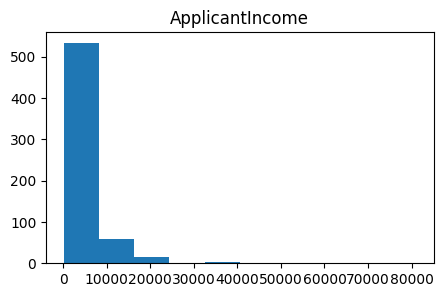

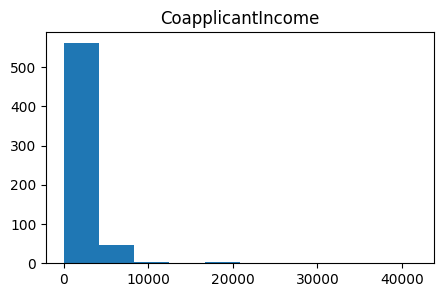

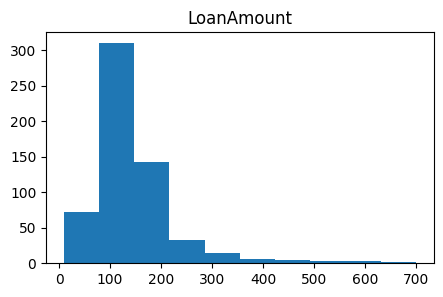

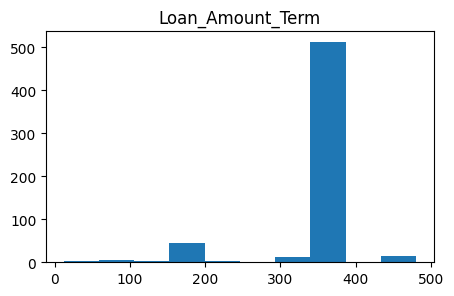

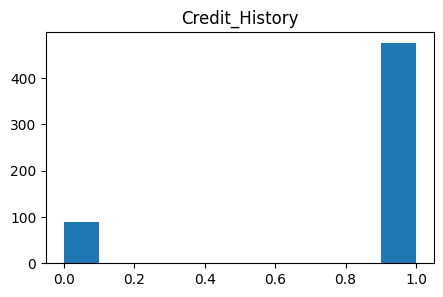

In [10]:
#Check distribution using histogram

for col in Numerical_features:
  plt.figure(figsize=(5, 3))
  plt.hist(df[col])
  plt.title(col)
  plt.show()

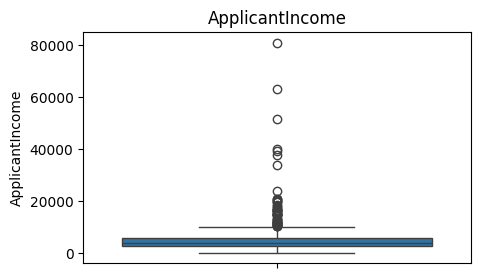

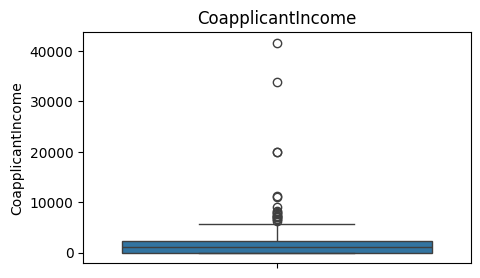

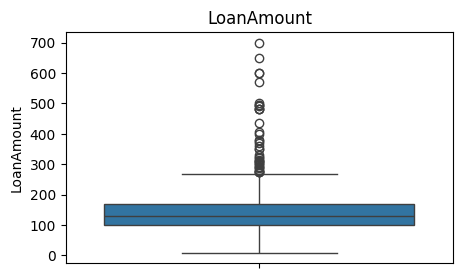

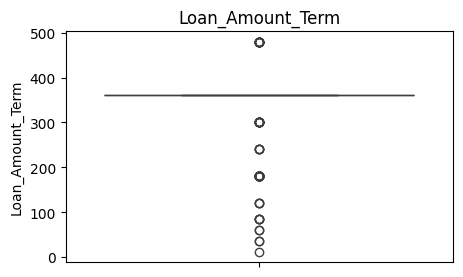

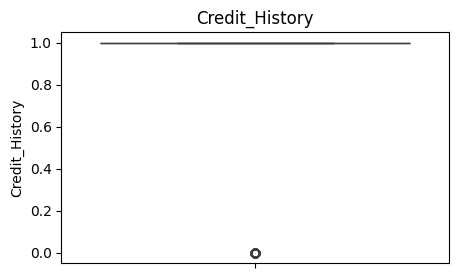

In [11]:
#Boxplot for detecting Outliers

for col in Numerical_features:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

**Pre-processing**

In [12]:
Numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
df['Loan_Amount_Term'].head()

,Loan_Amount_Term
0,360.0
1,360.0
2,360.0
3,360.0
4,360.0


In [14]:
df['Loan_Amount_Term'].nunique()

10

In [15]:
#Missing Value Handling

df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(),inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<ipython-input-15-d616678c03c5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(),inplace=True)
<ipython-input-15-d616678c03c5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [16]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [17]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)



<ipython-input-17-cea531525e99>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
<ipython-input-17-cea531525e99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [18]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<ipython-input-19-24aaf15f97d0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

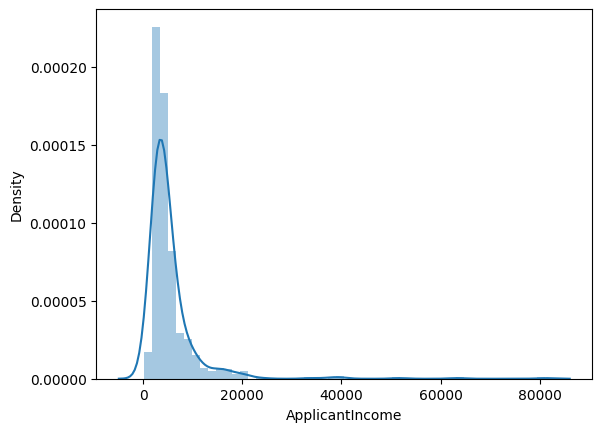

In [19]:
#Outlier Handling

sns.distplot(df["ApplicantIncome"])



<ipython-input-20-a57b2740f2e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

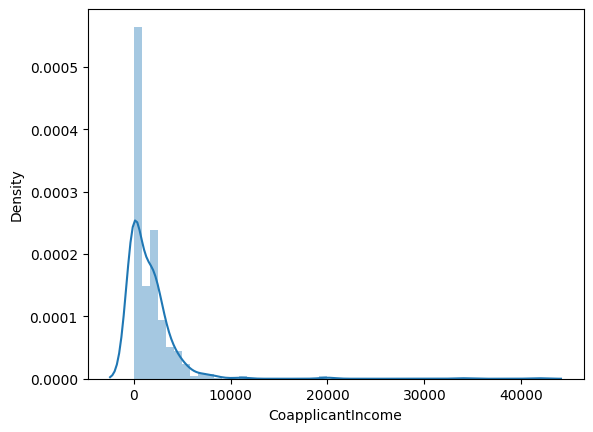

In [20]:
sns.distplot(df["CoapplicantIncome"])


<ipython-input-21-c3db29b574fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount"])


<Axes: xlabel='LoanAmount', ylabel='Density'>

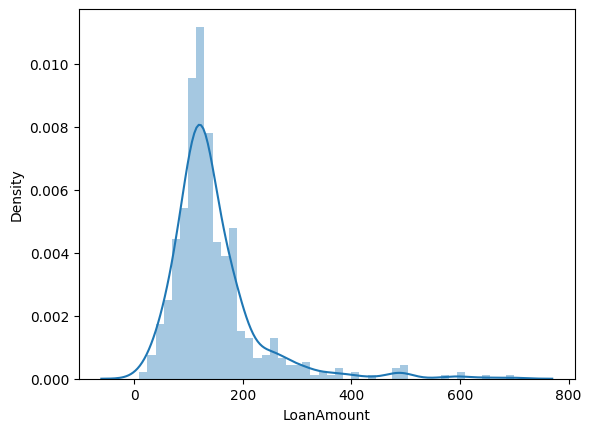

In [21]:
sns.distplot(df["LoanAmount"])

In [22]:
#Perform feature Engineering

df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']


In [23]:
df['TotalIncome'].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


<ipython-input-24-2cce2423b871>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalIncome"])


<Axes: xlabel='TotalIncome', ylabel='Density'>

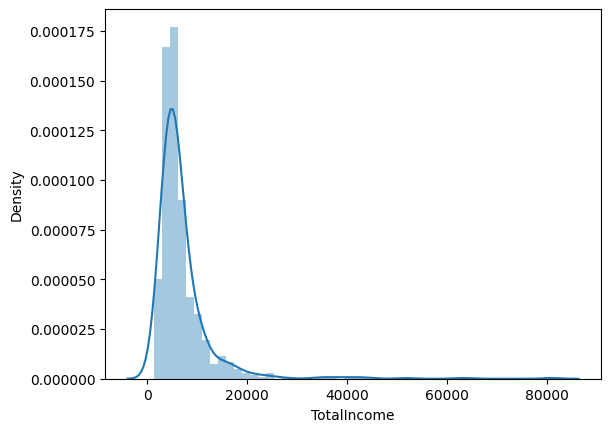

In [24]:
sns.distplot(df["TotalIncome"])

In [25]:
#Handle Outliers with Log Transformation

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<ipython-input-26-3fa4b83cc176>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TotalIncome_log"])


<Axes: xlabel='TotalIncome_log', ylabel='Density'>

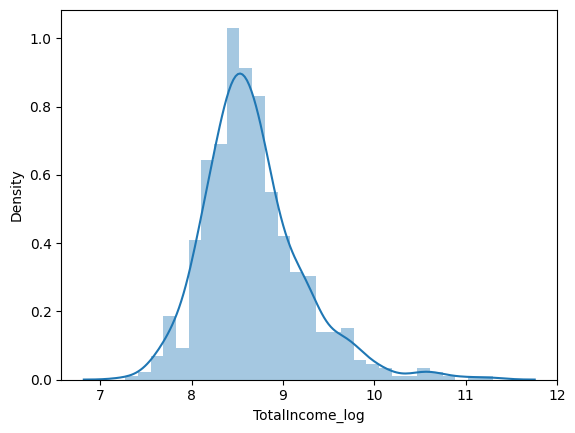

In [26]:
#Check distribution after Log transformation

sns.distplot(df["TotalIncome_log"])

<ipython-input-27-200a995b6e4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LoanAmount_log"])


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

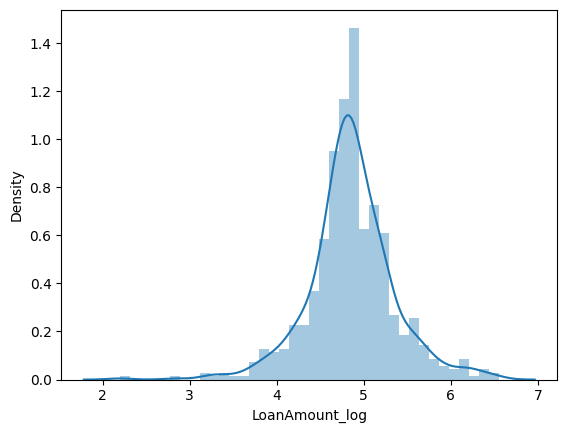

In [27]:
sns.distplot(df["LoanAmount_log"])

In [28]:
df=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount"],axis=1)

In [29]:
#Encoding Categorical Variables

Categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [30]:
X=df.drop(['Loan_ID','Loan_Status'], axis=1)

In [31]:
y=df['Loan_Status']

In [32]:
#One hot encoding

X = pd.get_dummies(X,dtype = int)

In [33]:
X.head()

,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Dependents_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,5849.0,4.852030,8.674026,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,360.0,1.0,6091.0,4.852030,8.714568,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,360.0,1.0,3000.0,4.189655,8.006368,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,1
3,360.0,1.0,4941.0,4.787492,8.505323,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,1
4,360.0,1.0,6000.0,4.948760,8.699515,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [34]:
X.columns

Index(['Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'LoanAmount_log',
       'TotalIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [35]:
#Scaling

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
X = min_max.fit_transform(X)

In [36]:
#Convert back to datafram from Numpy array
X = pd.DataFrame(X)

In [37]:
X.columns = ['Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'LoanAmount_log',
       'TotalIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Dependents_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']

In [38]:
X.head()

,Loan_Amount_Term,Credit_History,TotalIncome,LoanAmount_log,TotalIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Dependents_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.74359,1.0,0.055394,0.609760,0.347590,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.74359,1.0,0.058435,0.609760,0.357654,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.74359,1.0,0.019583,0.457624,0.181853,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.74359,1.0,0.043980,0.594936,0.305712,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.74359,1.0,0.057292,0.631977,0.353918,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [39]:
#Perform different Ensemble Learning techniques in the given dataset.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier



In [42]:
#Creating a Base Classifier
base_classifier = DecisionTreeClassifier()

#Creating and Training the Bagging Classifier

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [43]:
#Making Predictions and Evaluating Accuracy

y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7723577235772358


In [50]:
#Random forest classifier

random_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [51]:
#Making Predictions and Evaluating Accuracy

y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7317073170731707


In [44]:
#Boosting Algorithm

from sklearn.ensemble import AdaBoostClassifier

In [45]:
#Defining the Weak Learner

base_classifier = DecisionTreeClassifier(max_depth=1)

#Creating and Training the AdaBoost Classifier

adaboost_classifier = AdaBoostClassifier(
    base_classifier, n_estimators=50, learning_rate=1.0, random_state=42
)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [47]:
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [52]:
#Gradient Boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [54]:
y_pred = gradient_boosting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6585365853658537


In [55]:
#Extreme Gradient Boosting (XGBoost)

import xgboost as xgb

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [59]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [60]:
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7479674796747967


In [61]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [62]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],}

In [63]:

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=1.0, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [64]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.8145949288806431


In [77]:
#Hyper parameter tuning Adaboost CLassifier

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

grid_search_ada = GridSearchCV(adaboost_classifier, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [78]:
grid_search_ada.best_params_

{'learning_rate': 0.001, 'n_estimators': 50}

In [79]:
best_score = grid_search_ada.best_score_
print("Best Score:", best_score)

Best Score: 0.8145949288806431


In [68]:
#Randomized search on random forest classifier

from sklearn.model_selection import RandomizedSearchCV

In [69]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [75]:

random_search = RandomizedSearchCV(random_forest_classifier,
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


In [76]:
model_random = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
model_random.fit(X_train, y_train)
y_pred_rand = model_random.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rand)
print("Accuracy:", accuracy)

Accuracy: 0.7967479674796748
